In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
df = pd.read_csv('pimadataorig.csv')
df

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [78]:
table = PrettyTable()
table.add_row([])


NameError: name 'PrettyTable' is not defined

In [79]:
# melihat nilai yang kosong dan melihat tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_preg        768 non-null    int64  
 1   glucose_conc    768 non-null    int64  
 2   diastolic_bp    768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   diab_pred       768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [81]:
#dapat dilihat bahwa kolom glucose_conc, diastolic_bp, skin_thickness, insulin	, bmi mempunyai nilai minimum 0 yang
#secara logika tidak makesense

array([[<Axes: title={'center': 'num_preg'}>,
        <Axes: title={'center': 'glucose_conc'}>,
        <Axes: title={'center': 'diastolic_bp'}>],
       [<Axes: title={'center': 'skin_thickness'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'diab_pred'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

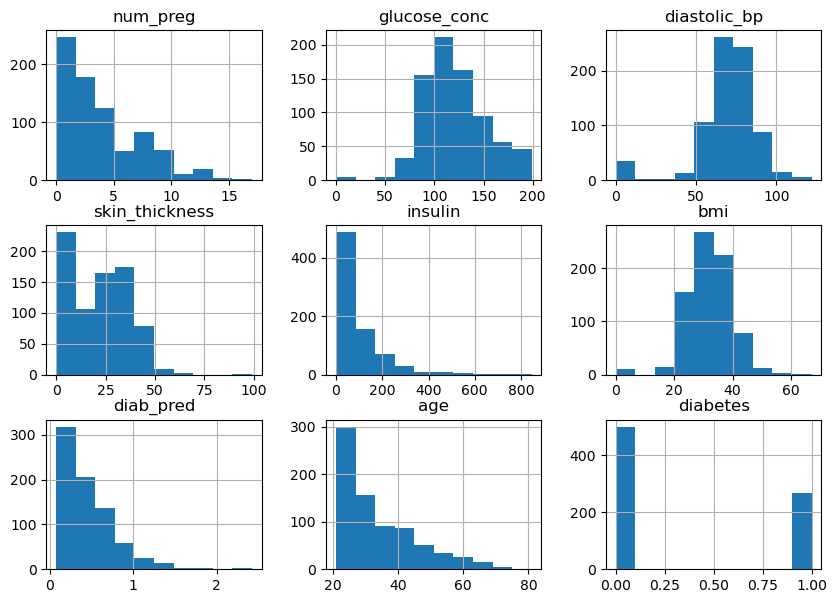

In [82]:
df.hist(figsize=(10,7))

In [83]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [84]:
median = ['num_preg','skin_thickness','insulin']#asymetric distribution: ganti nilai 0 dengan median
mean = ['glucose_conc','diastolic_bp','bmi']#symetric distribution: ganti nilai 0 dengan mean

In [85]:
def replace_zero(df, column_name, fill):
    if fill=='median':
        fill_value = df[column_name].median()
    elif fill=='mean':
        fill_value = df[column_name].mean()
    df[column_name] = df[column_name].replace(0, fill_value)
    return df

In [86]:
for col in median:
    df = replace_zero(df, col, 'median')
for col in mean:
    df = replace_zero(df, col, 'mean')

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
glucose_conc,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
diastolic_bp,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
skin_thickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
bmi,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Melihat Multicoliniearity antar variable

jika terdapat hubungan yang tinggi antar variable independent/feature (X)/variable input
(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'diabetes')
akan mengakibatkan model redundant]

<Axes: xlabel='glucose_conc', ylabel='insulin'>

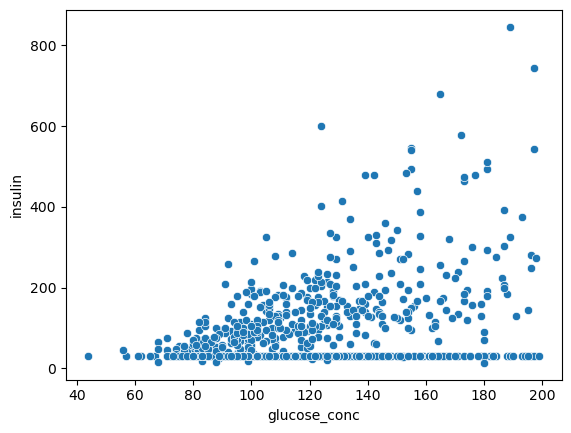

In [88]:
import seaborn as sns
sns.scatterplot(df, x='glucose_conc', y='insulin')

In [89]:
df.corr() # pearson correlation

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.148929,0.246388,0.060706,-0.059580,0.080538,-0.016151,0.538169,0.245466
glucose_conc,0.148929,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600,0.492908
diastolic_bp,0.246388,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740,0.162986
skin_thickness,0.060706,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514,0.189065
insulin,-0.059580,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413,0.148457
bmi,0.080538,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748,0.312254
diab_pred,-0.016151,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561,0.173844
age,0.538169,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000,0.238356
diabetes,0.245466,0.492908,0.162986,0.189065,0.148457,0.312254,0.173844,0.238356,1.000000


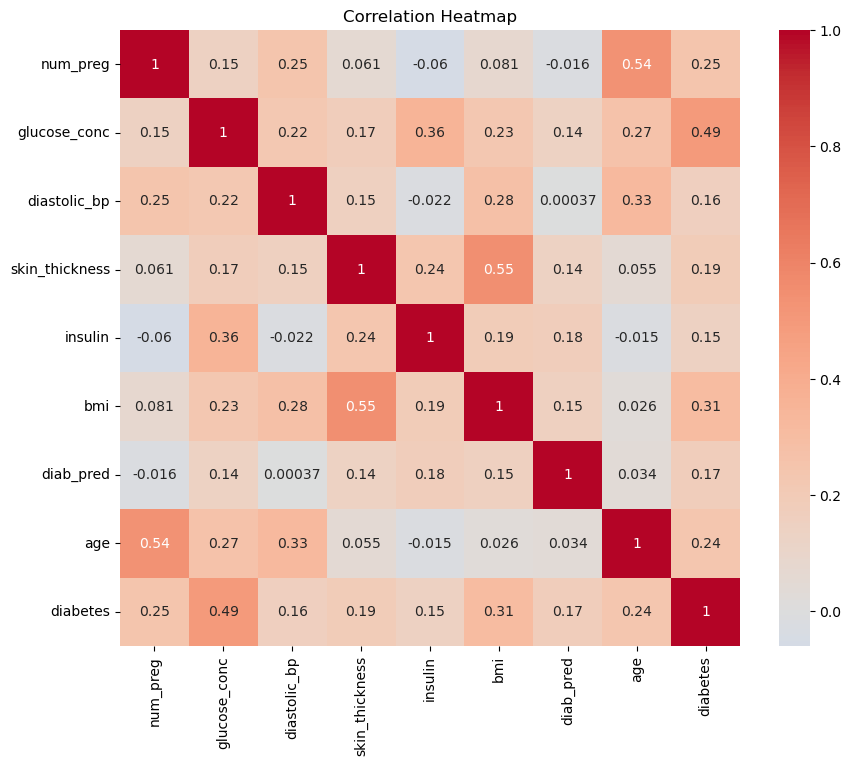

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

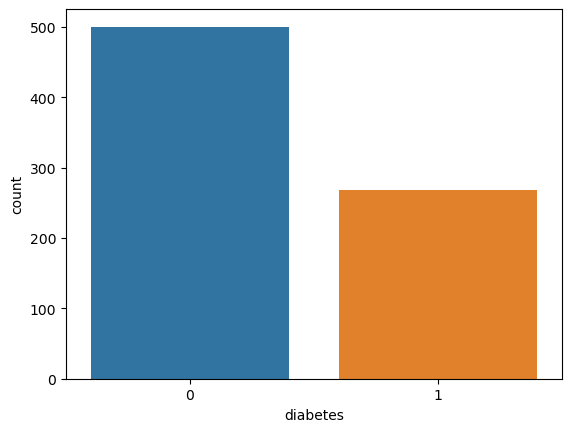

In [91]:
sns.countplot(df, x='diabetes')

### Split train test

In [92]:
X = df[['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age']]
y = df ['diabetes']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [94]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [127]:
y_test.value_counts()

0    144
1     87
Name: diabetes, dtype: int64

### Scalling Feature

In [95]:
df.head()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,3,137.0,40.0,35,168.0,43.1,2.288,33,1


In [96]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.021516,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


bisa kita lihat bahwa rentang nilai pada features berbeda, hal ini akan mengakibatkan kontribusi features dalam model akan cenderung terlalu jomplang. (nilai yang memiliki rentang tinggi cenderung dominan dalam menentukan target). oleh karena itu perlu dilakukan scalling nilai:
- StandardScaler()
- MinMaxScaler()

In [97]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [98]:
x = df[['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age']]
y = df ['diabetes']

In [99]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [100]:
pd.DataFrame(X_train, columns=df.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,537.0,1.290092e-16,1.000932,-1.051000,-0.721142,-0.391284,0.598290,4.226727
glucose_conc,537.0,2.050915e-16,1.000932,-2.508327,-0.745257,-0.168253,0.665198,2.460323
diastolic_bp,537.0,6.285061e-17,1.000932,-3.932586,-0.680341,-0.029892,0.620557,4.035414
skin_thickness,537.0,7.939025e-17,1.000932,-2.169137,-0.460554,-0.353767,0.500524,7.655216
insulin,537.0,-1.984756e-17,1.000932,-0.750658,-0.606123,-0.487867,0.265466,6.537404
bmi,537.0,-2.745579e-16,1.000932,-2.109175,-0.702119,-0.065241,0.601259,5.133461
diab_pred,537.0,6.615854e-17,1.000932,-1.154989,-0.674852,-0.296744,0.402456,5.873017
age,537.0,-2.778659e-16,1.000932,-1.030465,-0.776281,-0.352640,0.664099,4.053226


In [101]:
X_test = scaler.transform(X_test)

In [105]:
pd.DataFrame(X_test, columns=df.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,231.0,0.101361,0.985200,-1.051000,-0.391284,-0.391284,0.598290,3.237153
glucose_conc,231.0,-0.060443,0.914885,-2.091601,-0.713202,-0.136197,0.472863,2.396212
diastolic_bp,231.0,-0.030502,0.949056,-2.306463,-0.680341,-0.029892,0.457945,3.059741
skin_thickness,231.0,0.007735,0.950879,-2.169137,-0.460554,-0.460554,0.500524,3.490545
insulin,231.0,-0.146846,0.707609,-0.671821,-0.606123,-0.606123,0.226047,3.375156
bmi,231.0,0.005082,1.059851,-2.109175,-0.835419,-0.065241,0.616071,3.074716
diab_pred,231.0,0.089691,0.977876,-1.133983,-0.638842,-0.215721,0.648526,4.291566
age,231.0,0.022218,0.987846,-1.030465,-0.776281,-0.267911,0.537006,3.036488


### Training Model

In [145]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [146]:
def plot_confusion_matrix(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['non-diabetes', 'diabetes'])
    cmd.plot()

def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)

    print("Classification report for test")
    print(classification_report(y_test, y_test_pred))
    print('-'*100)
    print('recall_score\t:', recall_score(y_test, y_test_pred))
    print('precision_score\t:', precision_score(y_test, y_test_pred))
    print('accuracy_score\t:', accuracy_score(y_test, y_test_pred))
    
    plot_confusion_matrix(y_test, y_test_pred)
    return y_test, y_test_pred

Classification report for train
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       356
           1       0.81      0.63      0.71       181

    accuracy                           0.83       537
   macro avg       0.82      0.78      0.79       537
weighted avg       0.83      0.83      0.82       537

----------------------------------------------------------------------------------------------------
Classification report for test
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       144
           1       0.75      0.46      0.57        87

    accuracy                           0.74       231
   macro avg       0.75      0.68      0.69       231
weighted avg       0.74      0.74      0.72       231

----------------------------------------------------------------------------------------------------
recall_score	: 0.45977011494252873
precision_score	: 0.7547169811320755
accuracy_

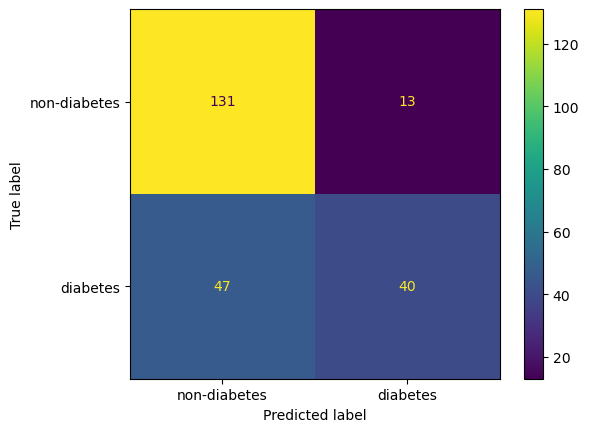

In [147]:
svc_model = SVC()
y_test_temp, y_test_pred = train_and_report(svc_model, X_train, X_test, y_train, y_test)

In [117]:
FN = 47
FP = 13
TP = 40
TN = 131

In [118]:
precision = TP/(TP+FP)
precision

0.7547169811320755

In [119]:
recall = TP/(TP+FN)
recall

0.45977011494252873

### Task
1. coba training dengan algoritma lain (logistic, desicion, random forest, KNN, Naive Bayes) dan hitung metricnya
2. gunakan MinMaxScaler dalam dan run ulang poin 1

on progress